In [6]:
#Tasks 1 & 2: Reading Data and Creating NumPy Matrices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, pearsonr, spearmanr
from pandas.plotting import scatter_matrix
import io
male_content = """# Body measurements of males >= 18 years old [cm]
#
# Weight (kg)
# Standing Height (cm)
# Upper Arm Length (cm)
# Upper Leg Length (cm)
# Arm Circumference (cm)
# Hip Circumference (cm)
# Waist Circumference (cm)
#
# The US Centers for Disease Control and Prevention
# National Health and Nutrition Examination Survey
# Based on 2017-March 2020 Data on Body Measures (P_BMX) and
# Demographic Variables and Sample Weights (P_DEMO)
# Published: May 2021
# Description: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.htm
# and https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.htm
# License: public domain as per https://www.cdc.gov/other/agencymaterials.html
"BMXWT","BMXHT","BMXARML","BMXLEG","BMXARMC","BMXHIP","BMXWAIST"
98.8,182.3,42,40.1,38.2,108.2,120.4
74.3,184.2,41.1,41,30.2,94.5,86.8
103.7,185.3,47,44,32,107.8,109.6
86,167.8,39.5,38.4,29,106.4,108.3
99.4,181.6,40.4,39.9,36,120.2,107
90.2,162.5,38.7,38,37.3,110.2,116.2
45.5,159.3,36.2,38,24.4,82,67.2
64,174.9,37,45,29.2,88.9,82.5
67.9,166.2,37.3,40.3,31,93.4,87
75.2,172.6,38.6,41.5,32,96.4,95
94.2,175.6,40.3,47,37.7,110.8,107.6
61.5,162.5,34.5,35.2,28.8,95.5,87.5
113,184.4,40.8,38.8,37.4,119.5,115.8
105.2,177.1,38.7,42.2,38,103.8,107.2
138.2,172.9,41.2,40.3,45.3,134.3,133.8
112.5,175.3,41,37.5,35.8,129,125.5
68.9,170.8,40,40.4,30.7,95,87.6
83.4,171.6,39.8,43.7,29.5,102.5,104.4
87.4,172.8,39.4,38.2,33.6,103.5,101.7
88.7,173.8,39.3,39.8,33.8,104.8,103.5
91.7,175,40.1,42.3,36.5,105.1,102.4
75.4,169.4,38.4,42,37.1,93.8,86.5
60.2,155.7,36.9,37.8,25.8,86.1,91.1
67.8,177.4,37.3,43.7,26.6,95.8,86.6
62.8,161.9,37.9,40,32.4,88.7,81.7
106.8,198.7,44,45.3,37.5,111,97.6
132.3,181.9,41.8,43.8,41.4,130.5,136.6
70.4,170.5,37,39.5,30.4,93.5,92.2
77.8,174.5,38.5,40.9,29.7,99.7,95.2
61.9,177.7,40,44,27.2,89,80.1
73.5,169.9,39,34.5,29.8,95.9,95.8
53.2,178.9,37.6,41.2,23.8,85.2,66.6
66.5,175.2,37.5,44.2,30,92.6,77.4
67.7,177.5,40.5,45,29.4,91,77
85.5,181.7,40.5,42.8,33,97.3,95.5
99.1,174.1,44,38.5,37.4,109.3,119.9
59.6,168.6,34.4,41.6,26.7,89.5,71.5
143.4,182,43.1,46,49.1,130.1,126.5
82.8,161.4,35,37.5,34.2,105.8,101.7
74.3,168.5,40.1,42.4,32.1,97.3,95
112.7,176.1,41.3,44.7,42.2,117.6,103.4
127.6,172.2,38.5,32,40.7,136,141.9
103.3,170.1,36.4,38.4,39.1,109.7,115.9
105.7,176.7,41.4,44.2,40,121.6,110.2
191.4,175.8,39.6,46.7,53.6,157,161.6
75.4,165.1,35.7,36.4,33,97.6,100.1
79.8,170.6,35.7,37.6,36.1,99.4,92.1
80.3,173.6,37.8,42.2,34.3,102.4,98.6
105.5,173.8,37.4,41.6,39.8,109.2,115.4
126.5,181.3,43.2,44.8,37.2,131.6,132.9
108.7,177.3,41,40.2,39.7,111.3,111.4
86.3,177.5,44,41,31.2,103.7,107.8
103.7,189,42,46.7,37.2,101.8,102.8
70.2,168.5,37.5,43.5,34.2,95.7,80.5
136.4,188.3,45,50.4,47.5,125.6,112.5
135.1,178.4,40.2,44.9,42,125.6,136.8
93.6,179.6,42.7,43,34.1,107,106.3
99.6,170.2,41.2,39.5,36.4,122.2,126.6
90.4,176.3,41.5,40.5,37.6,103.6,108.7
108.3,174.1,40.2,43,37.9,116,114
65.5,168.3,34.6,39.2,26.2,92.7,93
99.9,171.3,41.4,39.6,34.6,112.4,115
59,174,39,41,24.7,88.4,70
90.3,176.2,42,40.8,37.8,102.4,97.9
74.6,166.3,40.3,39.5,37.5,95,78.5
82.5,186.2,41.6,44.2,30.8,98.1,87.2
93.8,168.1,38.7,34.5,34.5,111.7,123.8
92.7,177.3,42,44.6,39.8,104,93
82.3,171.9,40,43.1,33.5,105.1,96.9
93.5,182.1,42,48.6,34.7,110.4,95.5
75.9,188.6,40.7,43.8,26.7,99.1,84
54.9,156.9,35.2,38.7,28.8,85.9,77.7
71.7,155,36,34,30.6,94.3,101.7
65.4,161.7,36.5,36,31.7,87.8,88
69.8,179.5,39.9,42.7,26.3,96.8,92.8
82.7,178.8,38.9,42.7,33.4,102.9,89.3
107,178.7,40.3,40.4,37.3,116.4,111.8
70.6,174.3,38,40.8,31.8,94.9,89.8
107.4,181.4,44.5,45.4,40.4,126.1,123.5
60,168.2,38,42,29.5,87,74.5
93.9,177.4,41,42.7,37.5,101.1,109.6
94.5,180.4,40.5,39,32.1,106.4,112.7
65.4,159.9,35.5,39.6,31.2,92.7,94.3
86.4,164.7,38,38,35,100.5,106.5
67.6,185.5,40,44.8,28,93.1,82.8
62.2,157.6,38.2,35.2,29,89.8,87.4
83.8,162.8,37,39.9,31.7,104,112.5
77.5,170.7,40.4,45.2,33.9,100.2,87
83.2,176.3,37.7,42.2,33.6,104,96
74.5,170.8,41.4,41.7,33,92.8,88.8
88.6,176.6,41.8,46.1,34.3,101.2,95.4
75,164.7,38.9,34.5,32.5,97.3,96.3
60.5,165.6,36.7,39.6,27.7,86.7,88.2
92.4,179.9,42.8,42.9,35.3,105.1,102.4
75.6,168.5,39.1,39.2,34.1,97.7,85.5
64.1,166.8,37,37.6,29,91.2,86.9
76.3,162.5,37,36.5,34.5,103.6,97.7
83.8,176.1,40.3,45.5,37.9,97.2,83.8
72.9,168.6,36.2,38.2,31.5,96.9,89.9
128.3,174.6,37.4,40.1,40.1,119.9,139.1
96.1,179.5,41.3,44.2,36,105.4,105
99.6,168.9,37.4,40.9,39.5,111.4,118.6
83.2,176.2,39.8,40.6,35.7,101.4,91.4
79.5,174.1,43.3,41.2,33.7,99.9,79.6
56.4,159.6,33.3,37.7,28.1,86.5,79.6
91.7,174.8,44.8,41.1,33.4,129.6,126.5
92.9,182,40.2,47.1,32.8,106.5,104
63.7,151.9,35.8,32.1,27,108,104.8
96,177.2,41.4,44.3,37.8,114.2,104
129.6,181.2,41.1,43.8,39.5,123.6,118.7
95.8,181.7,40.9,42.6,37,109.1,105.3
101.9,173.9,41,39,37.8,118,116.4
71.4,184.5,38.5,45.6,29.9,94.4,82.5
96.9,179.2,40,43.5,38.2,113.1,97.7
78.8,164.1,36.6,37.2,34.5,93,94.5
71.4,165.2,36,38.9,31,95.1,100.3
71.6,176.7,39.8,39.6,27.7,93.8,93.6
65.4,162.1,34.7,40.6,28.7,96.3,85.6
112.2,174.7,39.5,45.7,39.4,122.3,116.3
111.6,180,38.8,41.4,37.3,112,122.5
119.7,193.6,46,44,40.5,117.4,112.3
105.9,170.3,37.5,38.8,41.1,114.2,115.5"""

female_content = """# Body measurements of females >= 18 years old [cm], no missing data.
#
# Weight (kg)
# Standing Height (cm)
# Upper Arm Length (cm)
# Upper Leg Length (cm)
# Arm Circumference (cm)
# Hip Circumference (cm)
# Waist Circumference (cm)
#
# The US Centers for Disease Control and Prevention
# National Health and Nutrition Examination Survey
# Based on 2017-March 2020 Data on Body Measures (P_BMX) and
# Demographic Variables and Sample Weights (P_DEMO)
# Published: May 2021
# Description: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.htm
# and https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.htm
# License: public domain as per https://www.cdc.gov/other/agencymaterials.html
"BMXWT","BMXHT","BMXARML","BMXLEG","BMXARMC","BMXHIP","BMXWAIST"
97.1,160.2,34.7,40.8,35.8,126.1,117.9
91.1,152.7,33.5,33,38.5,125.5,103.1
73,161.2,37.4,38,31.8,106.2,92
61.7,157.4,38,34.7,29,101,90.5
55.4,154.6,34.6,34,28.3,92.5,73.2
62,144.7,32.5,34.2,29.8,106.7,84.8
66.2,166.5,37.5,37.6,32,96.3,95.7
75.9,154.5,35.4,37.6,32.7,107.7,98.7
77.2,159.2,38.5,40.5,35.7,102,97.5
91.6,174.5,36.1,45.9,35.2,121.3,100.3
83.5,158.7,36.6,39.9,34.5,114.4,96.7
62.8,146.5,32.6,32.7,32.6,102.3,94.6
64.2,163.6,36,37.4,27.6,94.8,86
56.8,162.3,37.2,40.1,28.2,97.5,77.2
63.4,163.6,36.3,38.5,28.4,97,92.7
62.5,154,31.3,33.6,29.2,96,80.6
59.8,156.1,36.3,38,29.7,99.5,88.1
107.2,164.6,37,38,42.3,129.5,122
97.8,159.4,36.2,38.7,36.8,122.3,112.2
92.1,161,35.2,36.3,36.1,119.3,111.1
138.7,158.7,38.5,40.6,48.6,150.4,131.7
53.6,165.4,35.5,37.4,27.5,90.5,82.5
100.8,157.8,35.8,35.6,40.7,120.4,116.3
46,146.7,30.4,30.6,24.5,85.7,75
85.4,163.3,38,38.5,34,114,113.2
60,154.6,33.6,33,30.6,99.3,89
67.2,157.2,35,36.7,30.5,107.9,94.6
83.2,157.9,37.2,38.3,34.4,116.5,105.5
91.7,160.1,35.6,32,37.1,115.5,114.1
106.1,166.6,40,43.5,42.3,129.7,111
81.3,154.4,34.6,38.8,33,120.9,109.1
84.3,163,38.5,40,33,106,102
52.3,156.1,33.1,34,29.5,87.5,73.6
126.2,160.5,35.2,32.8,36.2,148.3,135.6
77.6,159.1,37,41.1,31.6,110.2,93.6
64,162.6,36.6,37.6,29.7,103,90.6
54.1,163.8,35.3,38,25,97.3,76.4
67.2,153,33.1,35,31.9,99.2,101.9
81.7,149.9,36.3,37.2,45,112,110.9
114.6,163.6,34.6,39.4,43.4,130.5,129.8
61.3,154.3,33,37.4,31.2,99.7,86.7
63.7,151.1,35.5,34,33.1,101.2,97
66.9,148.6,32.4,33,29.8,108.7,106.9
54.3,165.6,33.5,38.6,25.1,91.8,73.3
85.6,162,36.1,41.4,39.5,111.7,94.6
52.6,171,36.7,40.8,24.6,88.4,71.7
67.9,160.8,35.6,37.9,29.5,102.8,88.8
135.8,163.3,39.1,35.9,48.2,142.1,142.9
62.6,150.6,34.7,38.9,28.8,99.6,95.6
76.1,170.7,33.7,39.2,29.4,105.1,90.4
90.6,180.4,40.9,43.1,32.2,117,93.6
104.3,164.1,39.8,36.7,35.8,139.3,128.9
77.4,161.8,36.5,39.3,32.1,108.1,95.4
79.1,162.5,36.5,36.5,33,110.3,95.6
94.1,156.9,37,34.5,35.5,126,118.3
124.6,164.5,37,34.9,40,141.6,140
58.5,149.8,33.2,33.2,30.2,96.1,84.2
75,164.1,34,38.5,32.8,106.9,104.3
105,164.2,37.5,41.1,43.2,130.7,108.4
52.9,151.9,37,38,26.1,93.4,81.5
78.9,155,32.5,33,32.2,115.9,120
69.5,157.3,38.8,40.8,33.7,106.8,96.3
55.9,152.6,35.2,38.6,29.2,95.4,79.9
73.2,155.6,34.7,31.3,30.8,109.4,104.3
95.5,163,37.7,40.6,36.9,117.6,109.6
88.4,164.5,38,43.5,34,111.2,114.9
110.9,168.8,36,37.7,37.1,120.4,114.5
100.1,154.2,37,32.1,38.3,127.5,118.7
77.7,156.4,32.5,39.5,32.3,108.2,93
108,160.1,38.2,39.1,36.5,130.2,113.5
93.6,158.4,38.5,35.6,37.4,125.5,109.3
51.2,161.6,33.8,40.5,23.9,90.7,66.2
76,161.8,40.2,41.3,33.7,106.9,105.6
111.3,168.7,36.6,37.2,39.2,132,132.2
113.2,161.1,34,35.3,39.1,133.7,116
71.5,167.3,38.5,35.4,31.3,101.8,93.2
92.4,161,37.5,38.5,38.2,121.4,122.5
56.9,159.4,33.5,35,26.1,91.3,86.1
71.2,161.8,37.2,37.1,30,102,89.5
68.4,171.1,35.4,40.5,27.7,100,86.6
92.2,151.4,34.8,34.3,40.7,132,116.2
70.9,148.9,34.7,32.9,29.2,118.4,103.6
76.5,157.6,35.8,33.4,32.2,108.9,95.9
55.4,157.8,35.3,43.9,27.1,102.4,75.6
53.4,165.6,35,39.2,26.4,94,72.5
80.8,170,40.2,36,34,103.6,97.2
81.6,157,35,30.7,30.4,104.7,101.9
51.3,165.1,35,41,23.5,85.5,72.3
112.9,162.1,39,39,45.2,130.5,122.4
93.7,161.9,34.4,38.5,34.2,121.4,118
53.3,151.1,33.2,35.4,27.5,91,84.5
84,158,35.6,37,34.2,118.8,101.1
89.2,173.4,37.6,44.2,35,122,93.4
115.8,162.9,38.5,36,42.4,133.1,128.2
69.3,156.6,35.7,35,33,103.6,95
84.1,165.9,38.5,36.8,34.6,115.2,102.5
81.6,153.7,35.2,32,32.3,116.2,109.2
73.9,157.1,36,36,33.3,106.2,99.8
105.2,160.6,37.3,31,44,130.2,126.2
70.2,163.6,35.5,37.5,27.6,110,99.3
104.1,167.7,39.5,37.7,39,127.2,118.6
59.8,152.4,31,32.6,28,95,83.7
63,160.1,39,38.3,28.7,100.6,90.6
91.1,157.8,38,39.3,36.4,120.2,114.8
51.7,165.1,34.6,38.4,26.1,89.7,70.5
59.7,167.6,37,42.5,26.6,98.7,80.6
85.7,167.3,36.5,38.6,34.2,108.6,99.8
75,156.9,35.5,38,34.2,106.5,97
87.3,161.5,36.6,32.6,34.3,116.3,114.8
67.3,158.2,34.8,37.6,30.3,100.9,92.6
76.1,161.4,36,39.5,31.4,107.4,95.8
77.6,159.1,37.8,38.7,32.3,112.9,103.7
79.4,154.8,37,37.9,35.9,111.3,109.7
89.1,159.3,37.9,40.3,36.2,112.3,103.5
105.4,177.7,40.8,37,38.5,113.5,119.7
98.3,159.8,36.5,38.9,40,131.5,128.7
86.7,174.1,40,39.5,33.9,107.6,107.6
67.6,149.5,33.8,38.2,31.8,99.1,86.2
112,160.3,39,36.6,40.5,135.6,122.2
58.7,164.5,36.1,38,28.1,97.3,76.7
48.9,153.9,35,35,25.4,88.2,81
55.6,162.9,38,37.9,28.8,95.5,83.5
88.1,163.2,37.5,38,35.2,108.7,99.4
85.8,157.4,35.1,39,31.8,114.5,103.3"""

expected_cols = [
    "weight", "height", "upper_arm_length", "upper_leg_length",
    "arm_circumference", "hip_circumference", "waist_circumference"
]

male_df = pd.read_csv(io.StringIO(male_content), sep=',', skiprows=20, header=None)
female_df = pd.read_csv(io.StringIO(female_content), sep=',', skiprows=20, header=None)

male = male_df.iloc[:, :7].to_numpy(dtype=float)
female = female_df.iloc[:, :7].to_numpy(dtype=float)

male_df.columns = expected_cols
female_df.columns = expected_cols

print(f"Male matrix shape: {male.shape}")
print(f"Female matrix shape: {female.shape}")

Male matrix shape: (121, 7)
Female matrix shape: (123, 7)


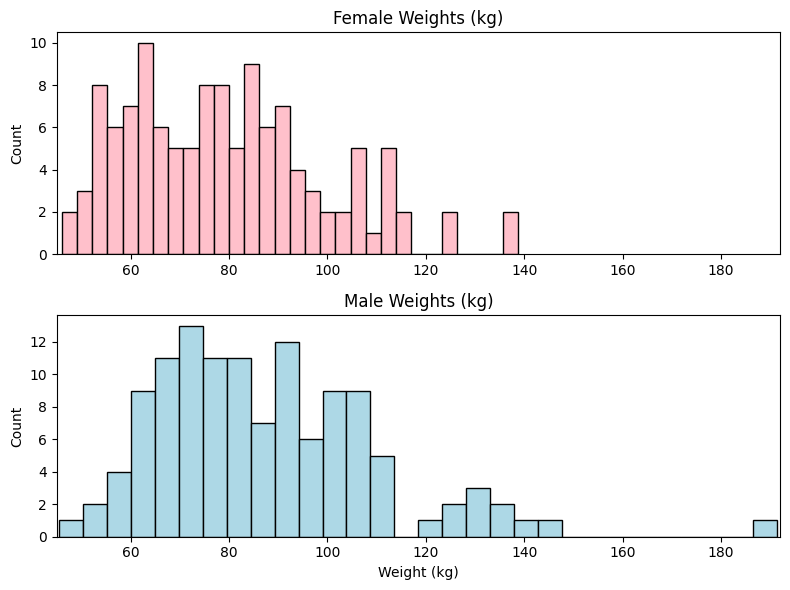

In [7]:
#Task 3: Histograms of Weights
female_weights = female[:, 0]
male_weights = male[:, 0]

# Calculate common x-limits for the plots
xmin = np.floor(min(female_weights.min(), male_weights.min()))
xmax = np.ceil(max(female_weights.max(), male_weights.max()))

fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].hist(female_weights, bins=30, color='pink', edgecolor='black')
axs[0].set_title("Female Weights (kg)")
axs[0].set_xlim(xmin, xmax)
axs[0].set_ylabel("Count")

axs[1].hist(male_weights, bins=30, color='lightblue', edgecolor='black')
axs[1].set_title("Male Weights (kg)")
axs[1].set_xlim(xmin, xmax)
axs[1].set_xlabel("Weight (kg)")
axs[1].set_ylabel("Count")

fig.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_16052\1204034747.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])


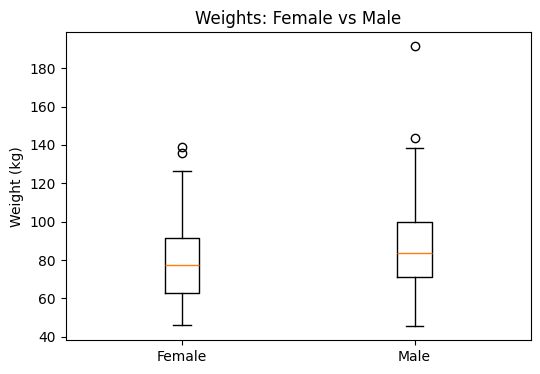

In [8]:
#Task 4 : Box-and-Whisker Plot
plt.figure(figsize=(6, 4))
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])
plt.ylabel("Weight (kg)")
plt.title("Weights: Female vs Male")
plt.show()

In [9]:
#Task 5: Basic Numerical Aggregates
def describe_weights(weights, name):
    print(f"\n--- Descriptive Statistics for {name} Weights ---")
    print(f"Mean: {np.mean(weights):.2f} kg")
    print(f"Median: {np.median(weights):.2f} kg")
    print(f"Standard Deviation: {np.std(weights):.2f} kg")
    q1 = np.percentile(weights, 25)
    q3 = np.percentile(weights, 75)
    iqr = q3 - q1
    print(f"IQR (Q3 - Q1): {iqr:.2f} kg")
    print(f"Skewness: {skew(weights):.2f}")
    print(f"Kurtosis: {kurtosis(weights):.2f}")
    print(f"Range: {np.max(weights) - np.min(weights):.2f} kg")

describe_weights(female_weights, "Female")
describe_weights(male_weights, "Male")


--- Descriptive Statistics for Female Weights ---
Mean: 79.36 kg
Median: 77.40 kg
Standard Deviation: 20.00 kg
IQR (Q3 - Q1): 28.75 kg
Skewness: 0.61
Kurtosis: -0.10
Range: 92.70 kg

--- Descriptive Statistics for Male Weights ---
Mean: 87.68 kg
Median: 83.80 kg
Standard Deviation: 22.61 kg
IQR (Q3 - Q1): 28.20 kg
Skewness: 1.17
Kurtosis: 2.60
Range: 145.90 kg


In [10]:
#Task 6: Add BMI to Female Matrix
female_height_m = female[:, 1] / 100
female_bmi = female[:, 0] / (female_height_m ** 2)
female = np.c_[female, female_bmi]
print(f"Female matrix shape after adding BMI: {female.shape}")

Female matrix shape after adding BMI: (123, 8)


In [11]:
#Task 7: Create Standardized Matrix (zfemale)
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0)
print(f"zfemale matrix shape: {zfemale.shape}")
print("zfemale sample (first 5 rows):\n", zfemale[:5, :].round(2))

zfemale matrix shape: (123, 8)
zfemale sample (first 5 rows):
 [[ 0.59 -1.17 -1.24 -1.42  1.    1.06  0.18  1.11]
 [-0.32  0.16  0.6   0.21 -0.28 -0.3  -0.49 -0.38]
 [-0.88 -0.43  0.89 -0.87 -0.81 -0.67 -0.59 -0.81]
 [-1.2  -0.87 -0.72 -1.09 -0.94 -1.27 -1.63 -1.05]
 [-0.87 -2.42 -1.71 -1.03 -0.66 -0.27 -0.93 -0.17]]


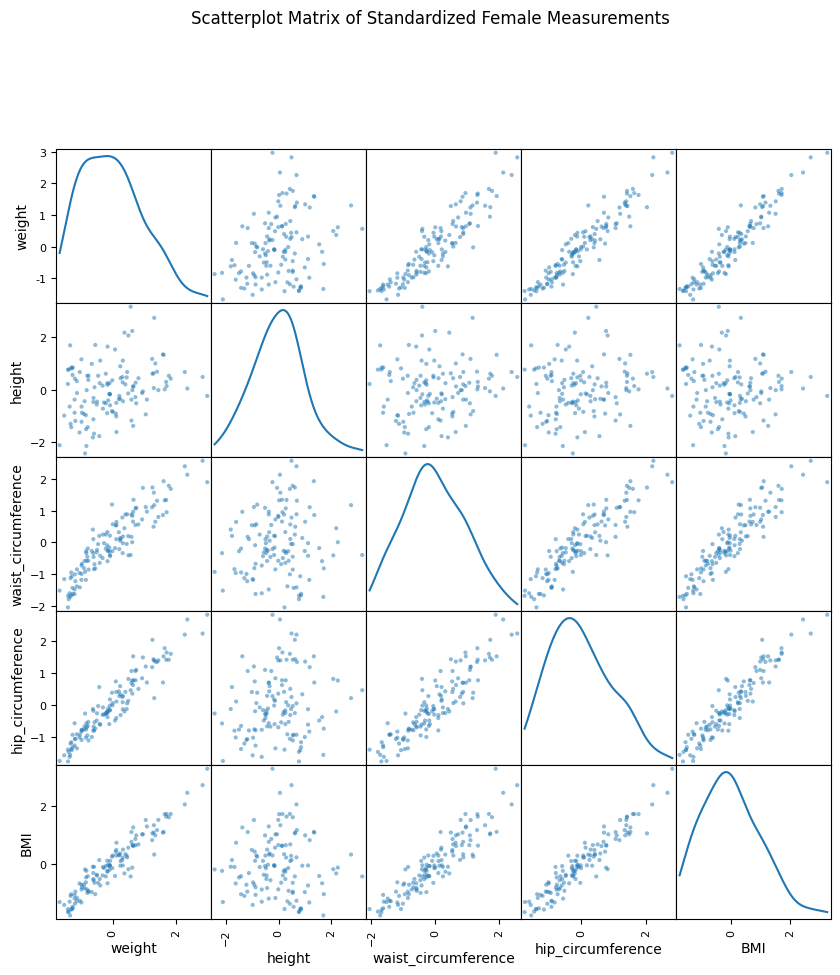


Pearson's and Spearman's Correlation Coefficients:
weight vs height: Pearson=0.29, Spearman=0.27
weight vs waist_circumference: Pearson=0.92, Spearman=0.91
weight vs hip_circumference: Pearson=0.95, Spearman=0.95
weight vs BMI: Pearson=0.95, Spearman=0.94
height vs waist_circumference: Pearson=0.11, Spearman=0.09
height vs hip_circumference: Pearson=0.15, Spearman=0.14
height vs BMI: Pearson=-0.01, Spearman=-0.03
waist_circumference vs hip_circumference: Pearson=0.91, Spearman=0.91
waist_circumference vs BMI: Pearson=0.92, Spearman=0.93
hip_circumference vs BMI: Pearson=0.95, Spearman=0.94


In [52]:
#Task 8: Scatterplot Matrix and Correlations
vars_to_plot = ["weight", "height", "waist_circumference", "hip_circumference", "BMI"]
zfemale_df = pd.DataFrame(zfemale[:, [0, 1, 6, 5, 7]], columns=vars_to_plot)
scatter_matrix(zfemale_df, figsize=(10, 10), diagonal='kde')
plt.suptitle("Scatterplot Matrix of Standardized Female Measurements", y=1.02)
plt.show()

print("\nPearson's and Spearman's Correlation Coefficients:")
for i in range(len(vars_to_plot)):
    for j in range(i + 1, len(vars_to_plot)):
        var1 = zfemale_df[vars_to_plot[i]]
        var2 = zfemale_df[vars_to_plot[j]]
        pearson, _ = pearsonr(var1, var2)
        spearman, _ = spearmanr(var1, var2)
        print(f"{vars_to_plot[i]} vs {vars_to_plot[j]}: Pearson={pearson:.2f}, Spearman={spearman:.2f}")

In [53]:
#Task 9: Compute Ratios and Add to Matrices
male_w_h_ratio = male[:, 6] / male[:, 1]
male_w_hip_ratio = male[:, 6] / male[:, 5]
male = np.c_[male, male_w_h_ratio, male_w_hip_ratio]

female_w_h_ratio = female[:, 6] / female[:, 1]
female_w_hip_ratio = female[:, 6] / female[:, 5]
female = np.c_[female, female_w_h_ratio, female_w_hip_ratio]

print(f"Male matrix shape with ratios: {male.shape}")
print(f"Female matrix shape with ratios: {female.shape}")

Male matrix shape with ratios: (121, 9)
Female matrix shape with ratios: (123, 10)


C:\Users\dell\AppData\Local\Temp\ipykernel_13568\3505864107.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


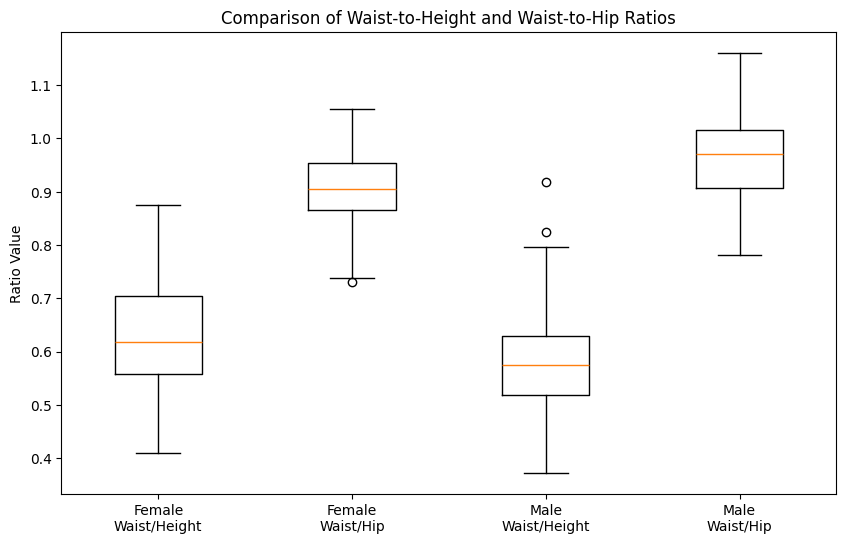

In [54]:
#Task 10: Box-and-Whisker Plot of Ratios
plt.figure(figsize=(10, 6))
plt.boxplot([
    female[:, -2], female[:, -1], male[:, -2], male[:, -1]
], labels=[
    "Female\nWaist/Height", "Female\nWaist/Hip", "Male\nWaist/Height", "Male\nWaist/Hip"
])
plt.ylabel("Ratio Value")
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.show()

In [ ]:
# Task 11: Advantages and Disadvantages of BMI, WtHR, and WHpR
# This is a discussion of the pros and cons of the different body composition metrics.

# BMI (Body Mass Index):

# Advantages: It is a simple, widely used, and inexpensive screening tool.

# Disadvantages: It doesn't differentiate between fat and muscle mass. It doesn't account for fat distribution, which is a key indicator of certain health risks.

# Waist-to-Height Ratio (WtHR):

# Advantages: It is a better predictor of visceral fat and related health risks than BMI. It's easy to calculate, and the rule of thumb 'keep your waist circumference less than half your height' is a simple and effective health guideline.

# Disadvantages: Requires an accurate waist measurement, which can be prone to user error. It is less known than BMI.

# Waist-to-Hip Ratio (WHpR):

# Advantages: It is a good indicator of body fat distribution. A higher ratio (more 'apple' shape) is associated with a higher risk of metabolic and cardiovascular diseases.

# Disadvantages: Can be less reliable than WtHR due to difficulties in accurately measuring hip circumference. The ratio is less sensitive to changes in body weight than BMI or WtHR.

In [55]:
#Task 12: Standardized Measurements for BMI Extremes
female_bmi = female[:, -3]
sorted_indices = np.argsort(female_bmi)
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

print("\nStandardized measurements for the 5 persons with the lowest BMI:")
for idx in lowest_bmi_indices:
    print(f"BMI={female_bmi[idx]:.2f}, Standardized Data: {zfemale[idx, :].round(2)}")

print("\nStandardized measurements for the 5 persons with the highest BMI:")
for idx in highest_bmi_indices:
    print(f"BMI={female_bmi[idx]:.2f}, Standardized Data: {zfemale[idx, :].round(2)}")


Standardized measurements for the 5 persons with the lowest BMI:
BMI=17.99, Standardized Data: [-1.34  1.69  0.27  1.13 -1.65 -1.56 -1.72 -1.75]
BMI=18.82, Standardized Data: [-1.4   0.77 -0.53  1.19 -1.86 -1.76 -1.69 -1.64]
BMI=18.97, Standardized Data: [-1.38  0.77 -0.72  0.34 -1.36 -1.47 -1.8  -1.62]
BMI=19.47, Standardized Data: [-1.3   0.85 -0.53  0.6  -1.31 -1.16 -1.67 -1.55]
BMI=19.59, Standardized Data: [-1.29  0.82 -0.29  0.02 -1.1  -1.41 -1.07 -1.53]

Standardized measurements for the 5 persons with the highest BMI:
BMI=43.64, Standardized Data: [ 1.82  0.43  1.12 -0.44  1.75  1.59  1.69  1.73]
BMI=46.05, Standardized Data: [ 2.26  0.68  0.42 -0.8   1.29  2.19  2.41  2.06]
BMI=48.99, Standardized Data: [ 2.34  0.05 -0.43 -1.49  0.56  2.66  2.14  2.46]
BMI=50.92, Standardized Data: [ 2.82  0.49  1.41 -0.47  2.85  2.23  2.58  2.72]
BMI=55.07, Standardized Data: [ 2.97 -0.23  1.12  1.06  2.93  2.81  1.91  3.28]
